# Вычислительная математика
## 1.2 Нормы. Числа обусловленности

Содержание семинара:

- __Задачи вычислительной линейной алгебры__
- __Задача СЛАУ__
    - Плохая обусловленность
- __Векторные нормы__
    - $\ell_1$, $\ell_2$ и $\ell_\infty$ нормы
    - Теорема об эквивалентности норм
    - Единичный диск
- __Матричные нормы. Свойства__
    - Согласованность, субмультипликативность и подчинённость
    - Лемма о подчинённой матричной норме
- __Сингулярное разложение__
- __Матричные нормы. Примеры__
    - Индуцированные нормы
    - Норма Фробениуса
- __Числа обусловленности__
    - Число обусловленности __системы__ при заданной правой части
    - Число обусловленности __матрицы__
    - Общая оценка погрешности системы при возмущённой матрице и правой части
    - Некоторые свойства числа обусловленности
- __Вычисление чисел обусловленности в разных нормах__
    - Общая формула для $\ell_2$
    - Оценка в нормах $\ell_1$ и $\ell_\infty$
    - Пример применения
    - Геометрический смысл
- __Домашнее задание__

## Задачи вычислительной линейной алгебры

К задачам, решаемым численно, относятся:

  - Решение систем линейных алгебраических уравнений

$$
\mathbf{A x}=\mathrm{f}
$$

- Вычисление определителей и обратных матриц

$$\operatorname{det} \mathbf{A}, \quad \mathbf{B}=\mathbf{A}^{-1}$$

- Вычисление собственных и сингулярных чисел и векторов

На практике разные вычислительные задачи приводят к необходимости решать линейные системы уравнений. С этой задачи и начнём.

В этом семинаре цель - понять, какие СЛАУ можно решать хорошо, а с какими возникнут трудности вне зависимости от метода решения. Также разберём базовые методы решения СЛАУ.

## Задача СЛАУ

Найти решение системы из $n$ линейных уравнений с $n$ неизвестными
$$
\left\{\begin{array}{c}
a_{11} x_1+a_{12} x_2+\cdots+a_{1 n} x_n=f_1 \\
a_{21} x_1+a_{22} x_2+\cdots+a_{2 n} x_n=f_2 \\
\vdots \\
a_{n 1} x_1+a_{n 2} x_2+\cdots+a_{n n} x_n=f_n
\end{array}\right.
$$
для краткости записанной в матричной форме

$$A x=f$$

Существование и единственность решения этой системы гарантируется при $\operatorname{det} \mathbf{A} \neq 0$.

Конечно, алгоритм её решения в общем случае математически можно явно задать методом поиска обратной, что крайне сложно, или методом Крамера. Однако в нём требуется явный расчёт определителей матриц $\Delta=\sum_{i_1, i_2, \ldots, i_n}(-1)^{P\left(i_1, i_2, \ldots, i_n\right)} a_{1 i_1} a_{2 i_2} \cdots a_{n i_n}$, которые считать крайне затратно. Фактически, сложность метода Крамера имеет асимптотику $\mathcal{O}(n \cdot n !)$, что сужает его применимость до матриц размера $n \lesssim 10$.

Прежде чем мы перейдём к непосредственным методам решения СЛАУ, отметим важной свойство данной задачи - СЛАУ может иметь  __критическую__ чувствительность к погрешностям коэффициентов.

### Влияние неустранимой погрешности на плохо-обусловленные системы.

Проиллюстрируем её на простом примере. Пусть решается система

$$
\left(\begin{array}{cc}
10 & 9 \\
9 & 8
\end{array}\right)\left(\begin{array}{l}
x_1 \\
x_2
\end{array}\right)=\left(\begin{array}{l}
19 . \\
17 .
\end{array}\right)
$$

причем матрица известна точно, а правая часть с погрешностью не более 3\%. Отметим, что определитель матрицы $\operatorname{det} \mathbf{A}=10 \cdot 8-9^2=-1 \neq 0$. С точки зрения линейной алгебры, проблем при решении данной системы не должно быть.

Посмотрим, на какую точность можно рассчитывать при решении системы. Для этого возьмём несколько векторов $f$ (рис. слева), отличающихся от правой части не более, чем на 3\%, и построим все возможные решения СЛАУ для них (рис. справа).

![original image](https://cdn.mathpix.com/snip/images/_SY9r480Tj2lpmH1l1mVwnP-C7xR_99bV9W1jlYXFfM.original.fullsize.png)

Задача оказалась __плохо обусловленной__. Сравнительно небольшие возмущения системы уравнений привели к существенным отклонениям в решении.

Обусловленность задачи _не связана_ с конкретным численным методом, это неустранимая ошибка. Существуют способы снижения погрешности, вызванной плохой обусловленностью:
- Каким-то образом перейти к хорошо обусловленной эквивалентной системе.
- Повысить точность определения коэффициентов СЛАУ и правой части.

Плохо обусловленные системы являются обобщением понятия вырожденных систем. Системы «близкие» к вырожденным скорее всего будут плохо обусловлены.  

По-хорошему нам нужен критерий "хорошести" матрицы $A$  и столбца свободных членов $f$, чтобы мы могли оценить, насколько вообще решение будет иметь смысл. Для этого нам понадобятся вспомнить матричные и векторные нормы.

---

## Векторные нормы

Обобщим длину вектора (расстояние между двумя точками). Такое обобщение называется нормой.

Норма - функционал $\|\mathbf{x}\|$ заданный на векторном пространстве $\mathbb{R}^n$, для которого выполняются утверждения:

* $\|\mathbf{x}\| = 0 \Leftrightarrow \mathbf{x} = \mathbf{0}$

* $\|\alpha \mathbf{x}\| = |\alpha|\|\mathbf{x}\|$

* $\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|$

Рассмотрим семейство норм $||\mathbf{x}||_p = (\sum\limits_{i = 1}^{n}|x_i|^p)^{\frac{1}{p}}$

*  $||\mathbf{x}||_1 =\sum\limits_{i = 1}^{n} |x_i| $ - манхэттенское расстояние, октаэдрическая, $\ell_1$ норма.

*  $||\mathbf{x}||_2 = (\sum\limits_{i = 1}^{n}x_i^2)^{\frac{1}{2}}$ - евклидова норма, $\ell_2$ норма.

*  $||\mathbf{x}||_{\infty} = \max\limits_{i}|x_i|$ - кубическая норма, $\ell_\infty$.

__Теорема (о константе эквивалентности конечномерных норм):__

Рассмотрим векторное пространство $\mathbb{R}^n$. Тогда:

$$\forall p,q \;\; \exists C_1, C_2 > 0 : \; \forall x \in \mathbb{R}^n \hookrightarrow  C_1||\mathbf{x}||_p\leq||\mathbf{x}||_q\leq C_2||\mathbf{x}||_p$$


### Визуализация векторных норм. Единичный диск.

- __$\ell_1$ норма__

 $\|\mathbf{x}\|_1 =\sum\limits_{i = 1}^{n} |x_i| $   

 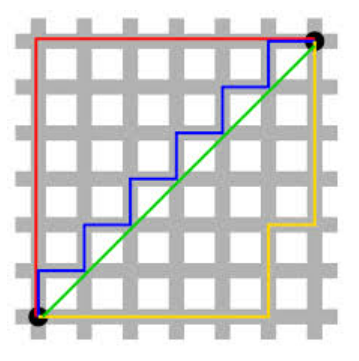

Пакет NumPy содержит всё необходимое для вычисления норм - функция __np.linalg.norm__.

In [1]:
import numpy as np
n = 100

a = np.ones(n)

b = a + 1e-3 * np.random.randn(n)

print('Relative error in L1 norm:', np.linalg.norm(a - b, 1) / np.linalg.norm(b, 1))
print('Relative error in L2 norm:', np.linalg.norm(a - b) / np.linalg.norm(b))
print('Relative error in Chebyshev norm:', np.linalg.norm(a - b, np.inf) / np.linalg.norm(b, np.inf))

Relative error in L1 norm: 0.0008088860183537642
Relative error in L2 norm: 0.0009837561540462858
Relative error in Chebyshev norm: 0.0022651258916263455


__Единичный диск__ – это множество точек такое, что

 $$\|\mathbf{x}\| <= 1 $$

Для евклидовой нормы единичный диск сопадает с обычным диском.

Для других норм единичный диск сильно отличается от привычного нам диска.

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=1$')

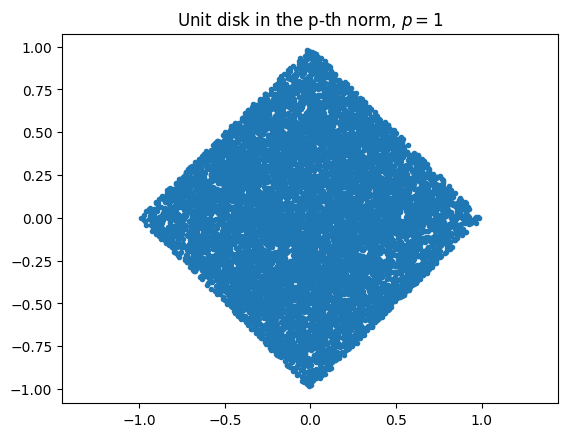

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
p = 1 # Which norm do we use
M = 40000 # Number of sampling points
a = np.random.randn(M, 2)
b = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = np.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=2$')

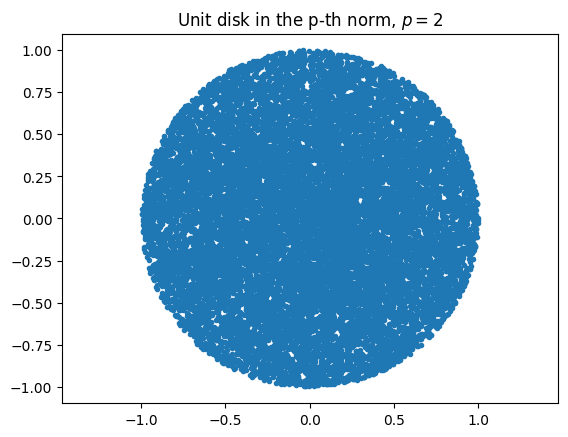

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
p = 2 # Which norm do we use
M = 40000 # Number of sampling points
a = np.random.randn(M, 2)
b = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = np.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

/home/egor/repoes/calculus_math_MIPT/venv/lib/python3.10/site-packages/numpy/linalg/_linalg.py:2840: RuntimeWarning: overflow encountered in power
  absx **= ord


Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=1000$')

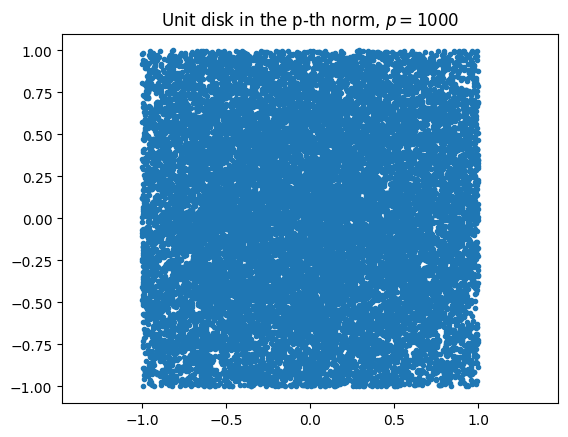

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
p = 1000 # Which norm do we use
M = 40000 # Number of sampling points
a = np.random.randn(M, 2)
b = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = np.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

## Матричные нормы

Норма матрицы должна удовлетворять стандартным аксиомам нормы:

- $\|\mathbf{A}\|=0 \quad \Leftrightarrow \quad \mathbf{A}=\mathbf{0}$
  
- $\|\alpha \mathbf{A}\|=|\alpha|\|\mathbf{A}\|, \quad \forall \alpha \in \mathbb{R}$
  
- $\|\mathbf{A}+\mathbf{B}\| \leqslant\|\mathbf{A}\|+\|\mathbf{B}\|$.

__Определение.__ Матричная норма $\|\mathbf{A}\|_{\text{matrix}}$ называется __согласованной__ с векторной нормой $\|\mathbf{x}\|_{\text{vector}}$, если выполняется соотношение

$$
\|\mathbf{A}\mathbf{x}\|_{\text{vector}} \leqslant\|\mathbf{A}\|_{\text{matrix}} \cdot\|\mathbf{x}\|_{\text{vector}}
$$

В дальнейшем не будем отдельно подписывать matrix и vector нормы - если норма берётся от вектора подразумеваем векторную норму и т.д.

__Определение.__ Матричная норма $\|\mathbf{A}\|$ называется __субмультипликативной__, если

$$
\|\mathbf{A} \cdot \mathbf{B}\| \leqslant\|\mathbf{A}\| \cdot\|\mathbf{B}\|
$$

Наконец введём ключевое определение, позволяющее естественным образом создавать матричную норму из векторной.

__Определение.__ Матричная норма $\|\mathbf{A}\|$ называется __подчиненной__ векторной норме $\|\mathrm{x}\|$, если

$$
\|\mathbf{A}\| \equiv \sup _{\mathbf{x} \neq \mathbf{0}} \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|}=\sup _{\|\mathbf{x}\|=1}\|\mathbf{A} \mathbf{x}\|
$$

Покажем, что определенные таким образом матричные нормы будут "хорошими" через следующую лемму.

__Лемма (об индуцированной норме).__ Если норма $\|\mathbf{A}\|$ __подчинена__ какой-то векторной норме $\|\mathbf{x}\|$, то она __субмультипликативна__ и __согласована__ с ней.

$\Delta$

1) Субмультипликативность

$$
\|\mathbf{A} \cdot \mathbf{B}\|=\sup _{\mathbf{x} \neq 0} \frac{\|\mathbf{A B} \mathbf{x}\|}{\|\mathbf{x}\|}=\sup _{\mathbf{B x} \neq 0} \frac{\|\mathbf{A B} \mathbf{x}\|}{\|\mathbf{x}\|} \leqslant \sup _{\mathbf{B x} \neq 0} \frac{\|\mathbf{A B} \mathbf{x}\|}{\|\mathbf{B} \mathbf{x}\|} \sup _{\mathbf{B} \mathbf{x} \neq 0} \frac{\|\mathbf{B} \mathbf{x}\|}{\|\mathbf{x}\|} \leqslant
$$

Последние два супремума взяты по части множества ненулевых векторов. От увеличения множества они не уменьшатся:

$$
\leqslant \sup _{\mathbf{y} \neq 0} \frac{\|\mathbf{A} \mathbf{y}\|}{\|\mathbf{y}\|} \sup _{\mathbf{z} \neq 0} \frac{\|\mathbf{B} \mathbf{z}\|}{\|\mathbf{z}\|}=\|\mathbf{A}\| \cdot\|\mathbf{B}\|
$$

2) Согласованность

$$
\|\mathbf{A}\|=\sup _{\mathbf{x} \neq \mathbf{0}} \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|} \Rightarrow\|\mathbf{A} \mathbf{x}\| \leqslant\|\mathbf{A}\| \cdot\|\mathbf{x}\|
$$

Кроме этого, из-за компактности множества $\left\{\mathrm{x} \in \mathbb{R}^n \mid\|\mathrm{x}\|=1\right\}$, точная верхняя грань достигается на некотором векторе $\mathrm{x}_0 \neq \mathbf{0}$, то есть для него справедливо

$$
\left\|\mathbf{A} \mathbf{x}_0\right\|=\|\mathbf{A}\| \cdot\left\|\mathbf{x}_0\right\|
$$


<div style="text-align: right"> ⬛ </div>

Прежде, чем мы перейдём к явному виду матричных норм для векторных норм, упомянутых ранее, введём ещё одно важное определение из линейной алгебры.

## Сингулярное разложение

__Определение.__ __Сингулярное разложение__ произвольной матрицы $\mathbf{A}$ есть

![original image](https://cdn.mathpix.com/snip/images/hT4mrYdCdSarZLNfsyODsPifVaxqorpPD2r530AsbFU.original.fullsize.png)



Элементы матрицы $\Sigma$ называются __сингулярными числами__. Они всегда положительны. Звёздочка на картинке - транспонирование и комплексное сопряжение (эрмитово сопряжение).

Свойства сингулярного разложения (см. картинку сверху):

- $r=\operatorname{rank}(A)$
  
- $U, V$ - унитарные ($U^{*}U=E$)
  
- $\sigma_1 \geq \ldots \geq \sigma_r>0$ - ненулевые _сингулярные_ числа. __Для эрмитовых матриц равны модулям собственных чисел.__

- Столбцы $U, V$ - _сингулярные_ вектора.

- Существует всегда для любой матрицы (даже неквадратной).

Модуль максимального сингулярного числа показывает, в какое максимальное число раз оператор может увеличить длину вектора своим действием.

Таким образом, __сингулярное разложение - это естественное обобщение спектрального разложения__.

---

## Явный вид матричных норм

Приведём явный вид матричных норм, подчинённых ранее определённым векторным нормам. Для док-ва этих явных видов см. лекцию B1 или прочитайте [презентацию](https://onedrive.live.com/?authkey=%21AI%5FBxUIavdEebNg&cid=6B66B90A1F084CD8&id=6B66B90A1F084CD8%21715&parId=6B66B90A1F084CD8%21256&o=OneUp). Также в дополнительных материалах лежат несколько полезных методичек.

- __Максимальная векторная норма__ ($\ell_\infty$): $\quad$ $\|\mathbf{x}\|_{\infty}=\max _i\left|x_i\right|$


Матричная норма, подчиненная максимальной векторной норме, имеет вид

$$
\|\mathbf{A}\|_{\infty}=\max _i \sum_j\left|a_{i j}\right|,
$$

и достигается на векторе $\mathrm{x}_0$, составленном из знаков строки матрицы А с максимальной суммой модулей элементов:

$$
\left\|\mathbf{A} \mathbf{x}_0\right\|_{\infty}=\|\mathbf{A}\|_{\infty} \cdot\left\|\mathbf{x}_0\right\|_{\infty}
$$

Т.е. максимальная матричная норма есть максимальная сумма модулей элементов в строке.

- __Манхэттенская норма__ $(\ell_1$): $\quad$ $\|\mathrm{x}\|_1=\sum_i\left|x_i\right|$

Матричная норма, подчиненная $\ell_1$ векторной норме, имеет вид

$$
\|\mathbf{A}\|_1=\max _j \sum_i\left|a_{i j}\right|=\left\|\mathbf{A}^{\top}\right\|_{\infty},
$$

и достигается на векторе $\mathrm{x}_0-\mathrm{j}$-м столбце единичной матрицы:

$$
\left\|\mathbf{A} \mathbf{x}_0\right\|_1=\|\mathbf{A}\|_1 \cdot\left\|\mathbf{x}_0\right\|_1
$$

Т.е. $\ell_1$ матричная норма есть максимальная сумма модулей элементов в столбце.

- __Евклидова норма__ ($\ell_2$): $\quad$ $\|\mathrm{x}\|_2 =  \|\mathrm{x}\|_e = \sqrt{\sum_i x_i^2}$

Евклидова норма матрицы А равна ее максимальному сингулярному числу

$$
\|\mathbf{A}\|_e=\sigma_{\max }(\mathbf{A})=\sqrt{\lambda_{\max }\left(\mathbf{A}^{\top} \mathbf{A}\right)},
$$

и достигается на соответствующем правом сингулярном векторе

$$
\mathbf{x}_0=\mathbf{V} \mathbf{z}_0=\mathbf{v}_{j_0}, \quad \mathbf{A}^{\top} \mathbf{A} \mathbf{v}_{j_0}=\lambda_{\max } \mathbf{v}_{j_0}
$$

где $j_0$ - номер максимального сингулярного числа, $\mathbf{v}_{j_0}-j_0$-й столбец матрицы V.

Как видим, достаточно посчитать собственные числа матрицы $\mathbf{A}^{\top} \mathbf{A}$, и взять из них корень.

- __Норма Фробениуса__

Является __неоператорной нормой__, т.е. неподчинённой никакой векторной нормой.

$$
\|A\|_F=\sqrt{\sum_{i=1}^n \sum_{j=1}^n\left|a_{i j}\right|^2}
$$

Норма Фробениуса легко вычисляется (по сравнению, например, со спектральной нормой). Обладает следующими свойствами:

- Согласованность $:\|\mathbf{A}\mathbf{x}\|_{2} \leq\|\mathbf{A}\|_{F}\|\mathbf{x}\|_{2}$, так как в силу неравенства Коши-Буняковского

$$
\|\mathbf{A}\mathbf{x}\|_{2}^{2}=\sum_{i=1}^{m}\left|\sum_{j=1}^{n} a_{i j} x_{j}\right|^{2} \leq \sum_{i=1}^{m}\left(\sum_{j=1}^{n}\left|a_{i j}\right|^{2} \sum_{j=1}^{n}\left|x_{j}\right|^{2}\right)=\sum_{j=1}^{n}\left|x_{j}\right|^{2}
\|\mathbf{A}\|_{F}^{2}=\|\mathbf{A}\|_{F}^{2}\|\mathbf{x}\|_{2}^{2}
$$

- Субмультипликативность: $\|\mathbf{A}\mathbf{B}\|_{F} \leq\|\mathbf{A}\|_{F}\|\mathbf{B}\|_{F}$, так как

$$
\|\mathbf{A}\mathbf{B}\|_{F}^{2}=\sum_{i, j}\left|\sum_{k} a_{i k} b_{k j}\right|^{2} \leq \sum_{i, j}\left(\sum_{k}\left|a_{i k}\right|\left|b_{k j}\right|\right)^{2} \leq \sum_{i, j}\left(\sum_{k}\left|a_{i k}\right|^{2} \sum_{k}\left|b_{k j}\right|^{2}\right)=\sum_{i, k}\left|a_{i k}\right|^{2} \sum_{k, j}\left|b_{k j}\right|^{2}=\|\mathbf{A}\|_{F}^{2}\|\mathbf{B}\|_{F}^{2}
$$

</br>

- $\|\mathbf{A}\|_{F}^{2}=\operatorname{tr} \mathbf{A}^{*} \mathbf{A}=\operatorname{tr} \mathbf{A} \mathbf{A}^{*}$, где $\operatorname{tr} \mathbf{A}-$ след матрицы $\mathbf{A}, \mathbf{A}^{*}$ - эрмитово-сопряжённая матрица.

</br>

- $\|\mathbf{A}\|_{F}^{2}=\sigma_{1}^{2}+\sigma_{2}^{2}+\cdots+\sigma_{r}^{2}$, где $\sigma_{1}, \sigma_{2}, \ldots, \sigma_{r}-$ сингулярные числа матрицы $\mathbf{A} .$

</br>

- $\|\mathbf{A}\|_{F} \geq\|\mathbf{A}\|_{2}$, где $\|\cdot\|_{2}-$ спектральная норма.

</br>

- $\|\mathbf{A}\|_{F}$ не изменяется при умножении матрицы $\mathbf{A}$ слева или справа на ортогональные (унитарные) матрицы.

</br>

Норма Фробениуса часто используется, потому что невязка многих методов минимизируется по ней (например, метода главных компонент). Норму Фробениуса также часто называют сферической или евклидовой, потому что она имеет простой геометрический смысл - сумма квадратов длин векторов, которые являются строками или столбцами матрицы. Отсюда также понятно, почему умножение матрицы на ортогональную не меняет её нормы Фробениуса. Соотношения эквивалентности её со спектральной нормой:

\begin{aligned}
&\|\mathbf{A}\|_{2} \leq\|\mathbf{A}\|_{F} \leq \sqrt{n}\|\mathbf{A}\|_{2} \\
&\frac{1}{\sqrt{n}}\|\mathbf{A}\|_{F} \leq\|\mathbf{A}\|_{2} \leq\|\mathbf{A}\|_{F}
\end{aligned}

Наконец, можем вернуться к оценке погрешности решения СЛАУ.

## Числа обусловленности

### Число обусловленности системы при заданной правой части
Рассмотрим систему линейных уравнений

$$
\mathbf{A x}=\mathbf{f},
$$

а также систему, получающуюся из нее возмущением правой части на вектор $\delta f$  (это не $\delta$ умноженное на $f$, а вектор возмущения):

$$
A \mathrm{x}^{\prime}=\mathrm{f}+\delta \mathrm{f} .
$$

В силу линейности,

$$
\delta \mathrm{x} \equiv \mathrm{x}^{\prime}-\mathrm{x}=\mathbf{A}^{-1} \delta \mathbf{f} .
$$

Оценим относительную погрешность решения в некоторой норме

$$
\frac{\|\delta \mathbf{x}\|}{\|\mathrm{x}\|}=\frac{\left\|\mathbf{A}^{-1} \delta \mathbf{f}\right\|}{\|\mathrm{x}\|} \leqslant \frac{\left\|\mathbf{A}^{-1}\right\|\|\delta \mathbf{f}\|}{\|\mathrm{x}\|}=\frac{\left\|\mathbf{A}^{-1}\right\|\|\mathrm{f}\|}{\|\mathrm{x}\|} \cdot \frac{\|\delta \mathbf{f}\|}{\|\mathrm{f}\|}
$$

Считаем, что матричная норма согласована с векторной, и мы можем оценить $\left\|\mathbf{A}^{-1} \delta \mathbf{f}\right\|$ сверху произведением норм $\left\|\mathbf{A}^{-1}\right\| \cdot\|\delta \mathbf{f}\|$.

Мы получили связь между относительной погрешностью решения и относительной погрешностью правой части системы уравнений:

$$
\frac{\|\delta \mathbf{x}\|}{\|\mathrm{x}\|} \leqslant \frac{\left\|\mathbf{A}^{-1}\right\|\|\mathrm{f}\|}{\|\mathrm{x}\|} \cdot \frac{\|\delta \mathbf{f}\|}{\|\mathrm{f}\|} .
$$

Величина

$$
\mathcal{V}(\mathbf{A}, \mathbf{f})=\frac{\left\|\mathbf{A}^{-1}\right\|\|\mathbf{f}\|}{\|\mathbf{x}\|}=\frac{\left\|\mathbf{A}^{-1}\right\|\|\mathbf{f}\|}{\left\|\mathbf{A}^{-1} \mathbf{f}\right\|}
$$

называется __числом обусловленности системы при заданной правой части__ и показывает, во сколько раз может возрасти относительная погрешность решения по сравнению с погрешностью правой части при решении системы $\mathbf{A x}=\mathbf{f}$.

Отметим, что $\left\|\mathbf{A}^{-1} \mathbf{f}\right\| \leqslant\left\|\mathbf{A}^{-1}\right\|\|\mathbf{f}\|$, и число $\mathcal{V}$ всегда не меньше единицы.

__Примечание о достижении равенства__: при выводе оценки

$$
\frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \leqslant \mathcal{V}(\mathbf{A}, \mathbf{f}) \frac{\|\delta \mathbf{f}\|}{\|\mathbf{f}\|}, \quad \mathcal{V}(\mathbf{A}, \mathbf{f})=\frac{\left\|\mathbf{A}^{-1}\right\|\|\mathbf{f}\|}{\|\mathbf{x}\|} .
$$

неравенство возникло из

$$
\left\|\mathbf{A}^{-1} \delta \mathbf{f}\right\| \leqslant\left\|\mathbf{A}^{-1}\right\| \cdot\|\delta \mathbf{f}\|,
$$

которое для подчиненных норм является точным. То есть, можно предъявить такой вектор $\delta f$, что для него неравенство превратится в равенство, а оценка

$$
\frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \leqslant \mathcal{V}(\mathbf{A}, \mathbf{f}) \frac{\|\delta \mathbf{f}\|}{\|\mathbf{f}\|}
$$

станет равенством

$$
\frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|}=\mathcal{V}(\mathbf{A}, \mathbf{f}) \frac{\|\delta \mathbf{f}\|}{\|\mathbf{f}\|} .
$$

### Число обусловленности матрицы

С одной стороны, число обусловленности $\mathcal{V}(\mathbf{A}, \mathbf{f})$ не может быть меньше единицы (опять-таки, можно предъявить $\mathrm{f}$, на котором $\mathcal{V}(\mathbf{A}, \mathbf{f})=1)$, но может ли оно для заданной матрицы $\mathbf{A}$ принимать сколь угодно большие значения?

Найдем универсальную, не зависящую от $f$, оценку сверху числа обусловленности:

$$
\mathcal{V}(\mathbf{A}, \mathbf{f}) \leq \sup _{\mathbf{f} \neq \mathbf{0}} \frac{\left\|\mathbf{A}^{-1}\right\|\|\mathbf{f}\|}{\left\|\mathbf{A}^{-1} \mathbf{f}\right\|}=\left\|\mathbf{A}^{-1}\right\| \sup _{\mathbf{x} \neq \mathbf{0}} \frac{\|\mathbf{A} \mathbf{x}\|}{\|\mathbf{x}\|}=\left\|\mathbf{A}^{-1}\right\| \cdot\|\mathbf{A}\| .
$$

Данная оценка достигается, когда $\|\mathbf{A} \mathbf{x}\|=\|\mathbf{A}\| \cdot\|\mathrm{x}\|$.

Число $\mu(\mathbf{A}) \equiv\|\mathbf{A}\| \cdot\left\|\mathbf{A}^{-1}\right\|$ называется __числом обусловленности матрицы__ и дает универсальную оценку относительной погрешности решения системы с матрицей А:

$$
\frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \leqslant \mu(\mathbf{A}) \frac{\|\delta \mathbf{f}\|}{\|\mathbf{f}\|}
$$

какой бы ни была правая часть $\mathbf{f}$.

### Общая оценка погрешности при возмущённой матрице

Можно показать, что если возмущается не только правая часть $\mathrm{f}$, но и сама матрица $\mathbf{A}$, то при условии $\left\|\mathbf{A}^{-1}\right\| \cdot\|\delta \mathbf{A}\|<1$ верно

$$
\frac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|} \leqslant \frac{\mu(\mathbf{A})}{1-\mu(\mathbf{A}) \frac{\|\delta \mathbf{A}\|}{\|\mathbf{A}\|}}\left(\frac{\|\delta \mathbf{f}\|}{\|\mathbf{f}\|}+\frac{\|\delta \mathbf{A}\|}{\|\mathbf{A}\|}\right)
$$

Это и есть погрешность решения при погрешности коэффициентов решения.

Доказательство можно найти в Петров И.Б., Лобанов А.И. Лекции по вычислительной математике, 2006, стр. 37.

### Некоторые свойства числа обусловленности

*  При $||\mathbf{x}|| = 1$ выполняется $\mu = \frac{sup||\mathbf{Ax}||}{inf||\mathbf{Ax}||}$

*  $\mu \geq \frac{\max\limits_{i}|\lambda_i(\mathbf{A})|}{\min\limits_{i}|\lambda_i(\mathbf{A})|}$

*  $\mu \geq 1$ </br>

*  $\mu(\mathbf{AB}) \geq \mu(\mathbf{A})\mu(\mathbf{B})$

## Вычисление чисел обусловленности в разных нормах

### Общая формула для евклидовой нормы

Число обусловленности $\mu(\mathbf{A})$ зависит от выбранной матричной нормы. Например, для евклидовой нормы $\sigma_{\max }\left(\mathbf{A}^{-1}\right)=\frac{1}{\sigma_{\min }(\mathbf{A})}$ и число обусловленности матрицы в евклидовой норме принимает вид

$$
\mu_e(\mathbf{A})=\frac{\sigma_{\max }(\mathbf{A})}{\sigma_{\min }(\mathbf{A})} = \sqrt{\frac{\lambda_\text{max}(\mathbf{A}^{\top} \mathbf{A})}{\lambda_\text{min}(\mathbf{A}^{\top} \mathbf{A})}}
$$

### Оценка числа обусловленности для бесконечной и $\ell_1$ нормы

Поскольку бесконечная и $\ell_1$ матричные нормы связаны соотношением

$$
\|\mathbf{A}\|_{\infty}=\left\|\mathbf{A}^{\top}\right\|_1,
$$

аналогично оказываются связанными числа обусловленности

$$
\mu_{\infty}(\mathbf{A})=\mu_1\left(\mathbf{A}^{\top}\right)
$$

Трудность практической оценки числа обусловленности заключается в оценке нормы $\left\|\mathbf{A}^{-1}\right\|$. Введем важное понятие диагонального преобладания.

__Определение.__ Обозначим $d_i=\left|a_{i i}\right|-\sum_{j \neq i}\left|a_{i j}\right|$. Говорят, что матрица имеет __строгое диагональное преобладание__, если для каждой строки

$$
d_i>0 \quad \Leftrightarrow \quad\left|a_{i i}\right|>\sum_{j \neq i}\left|a_{i j}\right|, \quad \forall i=1, \ldots, n
$$

Т.е. диагональное преобладание означает, что модуль $i$-го элемента на диагональ больше суммы модулей всех остальных элементов на $i$-ой строке.

__Теорема (Varah, 1974).__ Если матрица А имеет строгое диагональное преобладание, то

$$
\left\|\mathbf{A}^{-1}\right\|_{\infty}<\frac{1}{\min _i d_i}=\frac{1}{\min _i\left|a_{i i}\right|-\sum_{j \neq i}\left|a_{i j}\right|}
$$

Подставляя эту оценку в определение $\mu_{\infty}(\mathbf{A})$, получаем

$$
\mu_{\infty}(\mathbf{A})<\frac{\max _i\left|a_{i i}\right|+\sum_{j \neq i}\left|a_{i j}\right|}{\min _i\left|a_{i i}\right|-\sum_{j \neq i}\left|a_{i j}\right|} .
$$

Аналогичная оценка для $\mu_1(\mathbf{A})$ получается при наличии у матрицы диагонального преобладания по столбцам.

### Оценка для конкретной задачи

Вернемся к системе

$$
\left(\begin{array}{cc}
10 & 9 \\
9 & 8
\end{array}\right)\left(\begin{array}{l}
x_1 \\
x_2
\end{array}\right)=\left(\begin{array}{c}
19 . \\
17 .
\end{array}\right), \quad \mathbf{A}^{-1}=\frac{1}{-1}\left(\begin{array}{cc}
8 & -9 \\
-9 & 10
\end{array}\right)
$$

и посчитаем ее числа обусловленности в разных нормах:

$$
\begin{aligned}
\|\mathbf{A}\|_{\infty}=&\|\mathbf{A}\|_1=19, \quad\left\|\mathbf{A}^{-1}\right\|_{\infty}=\left\|\mathbf{A}^{-1}\right\|_1=19 \\
& \mu_1(\mathbf{A})=\mu_{\infty}(\mathbf{A})=19 \cdot 19=361
\end{aligned}
$$

Матрица симметрична, значит

$$
\mu_e(\mathbf{A})=\left|\frac{\lambda_{\max }(\mathbf{A})}{\lambda_{\min }(\mathbf{A})}\right|=\frac{\sqrt{82}+9}{\sqrt{82}-9} \approx 326 .
$$

Таким образом, погрешность в $3 \%$ в правой части решения приводит примерно к $1000\%$ ошибки в решении!

### Геометрический смысл числа обусловленности

Фактически, при решении системы
$$
\left(\begin{array}{cc}
10 & 9 \\
9 & 8
\end{array}\right)\left(\begin{array}{l}
x_{1} \\
x_{2}
\end{array}\right)=\left(\begin{array}{l}
19 \\
17
\end{array}\right)
$$

мы пытаемся разложить вектор $\mathbf{f}=(19,17)^{\top}$ по базису из почти коллинеарных векторов $\mathbf{e}_{1}=(10,9)^{\top}$ и $\mathbf{e}_{2}=(9,8)^{\top}$

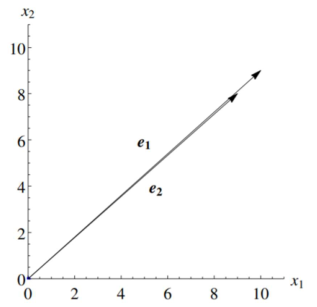

Минимальное значение числа обусловленности равно 1 (когда векторы, составленные из коэффициентов матрицы системы, ортогональны), а максимальное значение не ограничено. В некотором приближении можно рассматривать как "меру мультиколлинеарности" гиперплоскостей, которые заданы уравнениями системы - число обусловленности стремится к бесконечности, когда матрица стремится к вырожденной.

С другой стороны, дело не только в том, что матрица может быть близка к вырожденной. Большие числа обусловленности также получаются, когда элементы матрицы сильно отличаются друг от друга, но матрица не стремится к вырожденной. Например

$\ \mathbf{A}\ =\ diag\ \left(x,1,1\ldots1\right),\ x>1\ \ \ \ \ \ \rightarrow\ ||\mathbf{A}|| = x $

$\ \mathbf{A}^{-1}\ =\ diag\ \left(1/x,1,1\ldots1\right),\ x>1\ \ \ \ \ \ \rightarrow\ ||\mathbf{A}^{-1}|| = 1 $

$\  \rightarrow\mu=x\$

Число обусловленности зависит от выбранной нормы и в разных нормах оно может иметь более конкретный геометрический смысл. Например, для евклидовой нормы $\sigma_{\max }\left(\mathbf{A}^{-1}\right)=\frac{1}{\sigma_{\min }(\mathbf{A})}$ и число обусловленности матрицы в евклидовой норме принимает вид
$$
\mu_{e}(\mathbf{A})=\frac{\sigma_{\max }(\mathbf{A})}{\sigma_{\min }(\mathbf{A})}
$$
Геометрически, $\mu_{e}(\mathbf{A})$ показывает насколько неравномерно преобразование А растягивает пространство по своим главным направлениям. На рисунке изображён круглый диск и результат умножения всех векторов внутри этого диска на матрицу $\mathbf{A}$

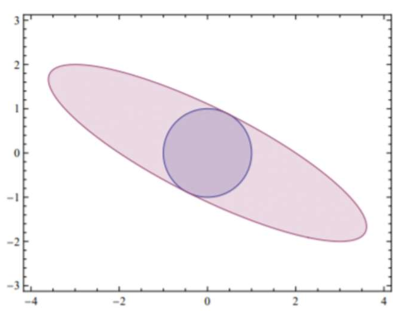  
  


## Домашнее задание

__Задание 1. Генератор случайных матриц.__

Реализовать генератор матриц, который должен поддерживать функции:
* Генерация абсолютно случайной матрицы $n\times m$
* Генерация случайной диагональной матрицы $n\times n$
* Генерация случайной верхнетреугольной матрицы
* Генерация случайной нижнетреугольной матрицы
* Генерация симметричной матрицы
* Генерация возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$. Оценить величину нормы матрицы возмущений в зависимости от параметра $\varepsilon$ (оценить верхную границу).

Оценить численно вероятность того, что созданная матрица будет вырожденной для какого-либо случая выше.

In [5]:
import numpy as np

def matrix_generate(rows, columns, type_ = "full", eps = 0):
    """
    matrix_generate(rows, columns, type_ = "full")

    Создаёт случайную матрицу выбранного типа.

    Если матрицу нужных размеров создать нельзя должен выдать
    строку f"Error with type {type_} and shape ({rows},{columns})".

    Parameters
    ----------

    rows : int
        Количество строк в создаваемой матрице.
    columns : int
        Количество столбцов в создаваемой матрице.
    type_ : str, optional
        Тип создаваемой матрицы: "full", "upper_triangular", "symmetric" и т.д.
    eps: float, optional
        Дополнительное число, использующееся при генерации для некоторых типов матриц.

    Returns
    -------
    out : ndarray or str
        Выдаёт матрицу нужного типа либо ошибку.

    Notes
    -----
    Поддерживаемые типы матриц:
        "full","upper_triangular", "lower_triangular"
        "symmetric", "diagonal", "perturbation" 


    """

    A = None

    if type_ == "full":

        A = np.random.random(size=(rows, columns))

    elif type_ == "upper_triangular":

        A = np.random.random(size=(rows, columns))
        A = np.triu(A) # Внутри работает на масках, это оптимизировано. (Звездочка, без цикла for)


    elif type_ == "symmetric":

        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"

        else:

            A = np.random.random(size=(rows, columns))
            A = (A + A.T)/2 # И эту секцую тоже перепишите без for (звёздочка). Учтите, что портить uniform распределение нельзя.
            

    elif type_ == "lower_triangular":
        A = np.random.random(size=(rows, columns))
        A = np.tril(A)
    
    elif type_ == "diagonal":
        if rows != columns:
            return f"Error with type {type_} and shape ({rows},{columns})"
        else:
            A = np.zeros((rows, columns))
            np.fill_diagonal(A, np.random.random(size=rows))
            
    elif type_ == "perturbation":
        A = np.random.uniform(-eps, eps, size = (rows, columns))

    return A

In [6]:
matrix_generate(1, 3)

array([[0.83062843, 0.74856646, 0.682722  ]])

In [7]:
matrix_generate(4, 4, type_ = "upper_triangular")

array([[0.31753289, 0.95580886, 0.72454451, 0.69781013],
       [0.        , 0.67535098, 0.28705868, 0.41363349],
       [0.        , 0.        , 0.54780606, 0.53952717],
       [0.        , 0.        , 0.        , 0.63191311]])

In [8]:
matrix_generate(4, 3, type_ = "upper_triangular")

array([[0.31478015, 0.52943417, 0.3357616 ],
       [0.        , 0.44496782, 0.01867671],
       [0.        , 0.        , 0.55084115],
       [0.        , 0.        , 0.        ]])

In [9]:
matrix_generate(4, 4, type_ = "symmetric")

array([[0.09362318, 0.48482083, 0.15882292, 0.43214977],
       [0.48482083, 0.6923259 , 0.3929407 , 0.43048735],
       [0.15882292, 0.3929407 , 0.22449121, 0.51212294],
       [0.43214977, 0.43048735, 0.51212294, 0.34044381]])

In [10]:
matrix_generate(4, 3, type_ = "perturbation", eps=100)

array([[ -5.53068803, -90.35165624, -24.89690818],
       [ 93.59519056, -39.11155793,  90.77906884],
       [ 22.67496395, -77.71098287, -12.44336442],
       [-41.27902259,  91.30774405,  -1.14510796]])

In [11]:
matrix_generate(4, 1, type_ = "symmetric")

'Error with type symmetric and shape (4,1)'

In [12]:
def degeneracy_probability(rows, columns, type_ = "full", eps = 0, n=1000):
    count_degenerate = 0
    for _ in range(n):
        if np.linalg.det(matrix_generate(rows, columns, type_, eps)) == 0:
            count_degenerate+=1
    return count_degenerate/n
        

In [13]:
print(degeneracy_probability(2, 2))

0.0


__Задание 2. Вычисление матричных норм и числа обусловленности.__

Реализовать вычисление трех основных норм векторов (L1, L2 и максимальную) и подчиненных им матричных норм. Реализовать вычисление числа обусловленности.

Примечание: для вычисления собственных значений можно использовать linalg.eigvals из модуля scipy.

In [14]:
def vector_norm(x, p=2):
    if p == 1:
        return np.sum(np.abs(x))
    elif p == 2:
        return np.sqrt(np.sum(np.pow(x, 2)))
    elif p == np.inf:
        return np.max(np.abs(x))


def matrix_norm(A, p=2):
    if p == 1:
        return np.max(np.sum(np.abs(A), axis=0))
    elif p == 2:
        return np.sqrt(np.max(np.linalg.eigvals(A.T @ A)))
    elif p == np.inf:
        return np.max(np.sum(np.abs(A), axis=1))


def matrix_conditioning_number(A, p=2):
    return matrix_norm(A, p) * matrix_norm(np.linalg.inv(A), p)

In [15]:
A = np.array([[1, 2],
              [3, 4]])

x = np.array([1, 2, 3])
print(f"L1 норма вектора [1, 2, 3]: {vector_norm(x, p=1)}")
print(f"L2 норма вектора [1, 2, 3]: {vector_norm(x)}")
print(f"Максимальная норма вектора [1, 2, 3]: {vector_norm(x, p=np.inf)}\n")

print(f"Матричная норма A (p=1): {matrix_norm(A, p=1)}")
print(f"Матричная норма A (p=2): {matrix_norm(A, p=2)}")
print(f"Матричная норма A (p=inf): {matrix_norm(A, p=np.inf)}\n")

print(f"Число обусловленности A (p=1): {matrix_conditioning_number(A, p=1)}")
print(f"Число обусловленности A (p=2): {matrix_conditioning_number(A)}")
print(f"Число обусловленности A (p=inf): {matrix_conditioning_number(A, p=np.inf)}")

L1 норма вектора [1, 2, 3]: 6
L2 норма вектора [1, 2, 3]: 3.7416573867739413
Максимальная норма вектора [1, 2, 3]: 3

Матричная норма A (p=1): 6
Матричная норма A (p=2): 5.464985704219043
Матричная норма A (p=inf): 7

Число обусловленности A (p=1): 20.999999999999993
Число обусловленности A (p=2): 14.93303437365925
Число обусловленности A (p=inf): 20.999999999999993


__Задание 3. Эквивалентность первых двух норм.__

Найдите константы $C_1$  и  $C_2$ такие, что

$\ C_1||\mathbf{x}||_2\leq||\mathbf{x}||_1\leq C_2||\mathbf{x}||_2$


Указание: в качестве подсказки можно использовать визуализацию норм из документа с теорией.

Решение в pdf

__Задание 4. Евклидова и бесконечная норма.__

 Пусть x — вектор размерности m, а A — матрица m×n. Докажите следующие неравенства и приведите
примеры таких x и A, при которых неравенства обращаются в равенства:

- $\|x\|_2 \leq \sqrt{m} \cdot \|x\|_{\infty}$
- $\|A\|_{\infty} \leq \sqrt{n} \cdot \|A\|_2$

Решение в pdf

__Задание 5.  Норма Фробениуса.__

Докажите, что для любой унитарной матрицы U (и для произвольной матрицы A) имеет место равенство

 $\| U A \|_F = \| AU \|_F = \| A \|_F$ ,

 где $\| \cdot \|_F$ — норма Фробениуса.

Указание.  
Задачу можно решить без вычислений, если использовать геометрический смысл нормы Фробениуса и геометрические свойства умножения на унитарную матрицу (что при умножении на неё сохраняется).

Решение в pdf

__Задание 6*.  Тензорная свёртка.__

Рассмотрим функцию, отображающую шесть тензоров на один тензор: $Z\left(\lambda^{(1)}, \lambda^{(2)}, \lambda^{(3)}, \Gamma^{(1)}, \Gamma^{(2)}, U\right)$ :


$$
Z_{a h i j}=\sum_{b c d e f g} \lambda^{(1)}{ }_{a b} \Gamma_{c b d}^{(1)} \lambda^{(2)}{ }_{d e} \Gamma_{f e g}^{(2)} \lambda_{g h}^{(3)} U_{i j c f}
$$

редположив, что все индексы пробегают значения от 1 до χ, проведите эксперимент и сравните скорость
различных реализаций функции Z. Исследуйте значения χ в диапазоне 3–50.


- В файле convolution.ipynb вы можете найти релизацию глупого способа вычисления этой свертки, который требует $\chi^4 \times \chi^6=\chi^{10}$ операций. На самом деле это можно вычислить гораздо быстрее!
- С помощью функции numpy.einsum (нужно использовать аргумент optimize), можно добиться намного большей производительности. Чтобы понять, что происходит под капотом, воспользуйтесь функцией numpy.einsum_path. Какое минимальное количество операций требуется для вычисления $Z$ ?
- Посмотрев на вывод функции numpy.einsum_path, peализуйте алгоритм для вычисления $Z$, который столь же эффективен, как numpy.einsum, но использует более элементарные numpy.dot и numpy.tensor_dot.


In [16]:
def Z_naive(chi, l1, l2, l3, G1, G2, U):
    Z = np.zeros((chi, chi, chi, chi), dtype=np.float64)
    for a in range(chi):
        for h in range(chi):
            for i in range(chi):
                for j in range(chi):
                    for b in range(chi):
                        for c in range(chi):
                            for d in range(chi):
                                for e in range(chi):
                                    for f in range(chi):
                                        for g in range(chi):
                                            Z[a, h, i, j] += l1[a, b] * G1[c, b, d] * l2[d, e] * G2[f, e, g] * l3[g, h] * U[i, j, c, f]
    return Z

In [17]:
def Z_einsum(l1, l2, l3, G1, G2, U):
    return np.einsum('ab,cbd,de,feg,gh,ijcf->ahij', l1, G1, l2, G2, l3, U, optimize='optimal')

In [18]:
def Z_optimal(l1, l2, l3, G1, G2, U):
  
    # Шаг 1: ab,cbd->acd
    temp1 = np.tensordot(l1, G1, axes=([1],[1]))
    # Шаг 2: de,feg->dfg
    temp2 = np.tensordot(l2, G2, axes=([1],[1]))
    # Шаг 3: dfg,gh->dfh
    temp3 = np.tensordot(temp2, l3, axes=([2],[0])) 
    # Шаг 4: acd, dfh->acfh
    temp4 = np.tensordot(temp1, temp3, axes=([2],[0]))
    # Шаг 5: acfh,ijcf->ahij
    Z = np.tensordot(temp4, U, axes=([1,2],[2,3]))
    
    return Z

In [19]:
import time

np.random.seed(42)

chi = np.arange(3, 50)

t_naive = []
t_einsum = []
t_optimal = []

for c in chi:
    lambda1 = np.random.normal(size=(c, c))
    lambda2 = np.random.normal(size=(c, c))
    lambda3 = np.random.normal(size=(c, c))
    G1 = np.random.normal(size=(c, c, c))
    G2 = np.random.normal(size=(c, c, c))
    U = np.random.normal(size=(c, c, c, c))
    
    if(c == 3):
        path = np.einsum_path('ab,cbd,de,feg,gh,ijcf->ahij', lambda1, G1, lambda2, G2, lambda3, U, optimize='optimal')
        print(path[0])
        print(path[1])
    
    Z1 = 0
    if(c < 6):
        start_time = time.perf_counter()
        Z1 = Z_naive(c, lambda1, lambda2, lambda3, G1, G2, U)
        end_time = time.perf_counter()
        iteration_time = end_time - start_time
        t_naive.append(iteration_time)
    
    start_time = time.perf_counter()
    Z2 = Z_einsum(lambda1, lambda2, lambda3, G1, G2, U)
    end_time = time.perf_counter()
    iteration_time = end_time - start_time
    t_einsum.append(iteration_time)
    
    start_time = time.perf_counter()
    Z3 = Z_optimal(lambda1, lambda2, lambda3, G1, G2, U)
    end_time = time.perf_counter()
    iteration_time = end_time - start_time
    t_optimal.append(iteration_time)
    print(c)

['einsum_path', (0, 1), (0, 1), (0, 3), (1, 2), (0, 1)]
  Complete contraction:  ab,cbd,de,feg,gh,ijcf->ahij
         Naive scaling:  10
     Optimized scaling:  6
      Naive FLOP count:  3.543e+05
  Optimized FLOP count:  2.431e+03
   Theoretical speedup:  145.740
  Largest intermediate:  8.100e+01 elements
--------------------------------------------------------------------------
scaling                  current                                remaining
--------------------------------------------------------------------------
   4                 cbd,ab->acd                 de,feg,gh,ijcf,acd->ahij
   4                 feg,de->dfg                    gh,ijcf,acd,dfg->ahij
   4                 dfg,gh->dfh                       ijcf,acd,dfh->ahij
   5               dfh,acd->acfh                          ijcf,acfh->ahij
   6             acfh,ijcf->ahij                               ahij->ahij
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


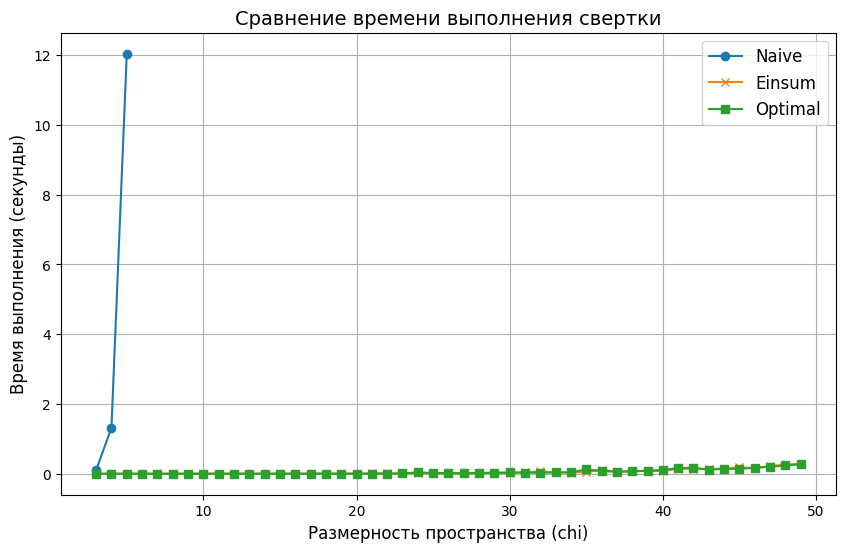

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(chi[:3], t_naive, label="Naive", marker='o')
plt.plot(chi, t_einsum, label="Einsum", marker='x')
plt.plot(chi, t_optimal, label="Optimal", marker='s')

plt.xlabel("Размерность пространства (chi)", fontsize=12)
plt.ylabel("Время выполнения (секунды)", fontsize=12)
plt.title("Сравнение времени выполнения свертки", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# plt.yscale("log")

plt.show()

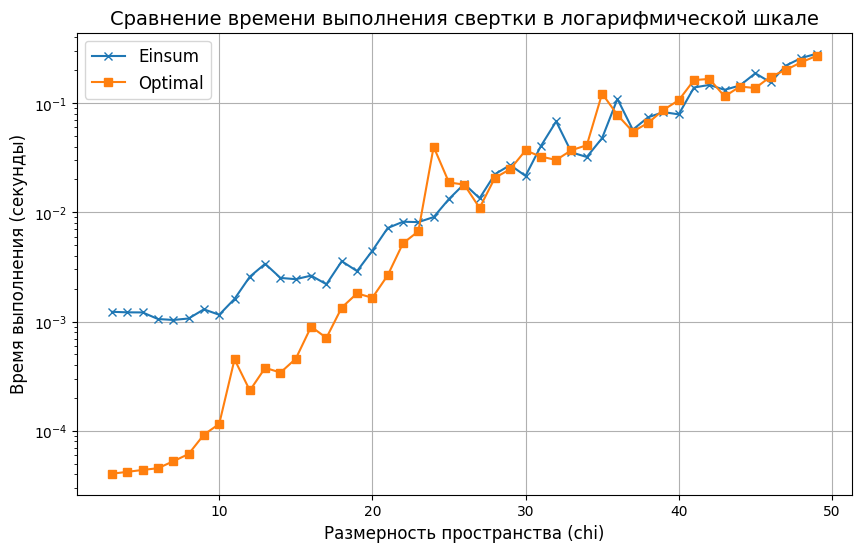

In [21]:
plt.figure(figsize=(10, 6))

plt.plot(chi, t_einsum, label="Einsum", marker='x')
plt.plot(chi, t_optimal, label="Optimal", marker='s')

plt.xlabel("Размерность пространства (chi)", fontsize=12)
plt.ylabel("Время выполнения (секунды)", fontsize=12)
plt.title("Сравнение времени выполнения свертки в логарифмической шкале", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

plt.yscale("log")

plt.show()